In [86]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("/content/QueryResults.csv")

df.columns.values[0] = "DATE"
df.columns.values[1] = "TAG"
df.columns.values[2] = "POSTS"
df

,DATE,TAG,POSTS
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,javascript,162
3,2008-08-01 00:00:00,c,85
4,2008-08-01 00:00:00,python,124
...,...,...,...
1986,2020-07-01 00:00:00,r,5694
1987,2020-07-01 00:00:00,go,743
1988,2020-07-01 00:00:00,ruby,775
1989,2020-07-01 00:00:00,perl,182


In [9]:
df.head()

,DATE,TAG,POSTS
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,javascript,162
3,2008-08-01 00:00:00,c,85
4,2008-08-01 00:00:00,python,124


In [10]:
df.tail()

,DATE,TAG,POSTS
1986,2020-07-01 00:00:00,r,5694
1987,2020-07-01 00:00:00,go,743
1988,2020-07-01 00:00:00,ruby,775
1989,2020-07-01 00:00:00,perl,182
1990,2020-07-01 00:00:00,swift,3607


In [14]:
df["POSTS"].size

1991

In [17]:
df.columns.size

3

In [20]:
df["DATE"].count()

np.int64(1991)

In [51]:
res = df.groupby("TAG")["POSTS"].sum()
res

,POSTS
TAG,
assembly,34852
c,336042
c#,1423530
c++,684210
delphi,46212
go,47499
java,1696403
javascript,2056510
perl,65286


In [52]:
res.idxmax()

'javascript'

In [53]:
res.idxmin()

'assembly'

In [59]:
df.groupby("TAG")["DATE"].count()

,DATE
TAG,
assembly,144
c,144
c#,145
c++,144
delphi,144
go,129
java,144
javascript,144
perl,144


In [65]:
df["DATE"] = pd.to_datetime(df["DATE"])
df

,DATE,TAG,POSTS
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,javascript,162
3,2008-08-01,c,85
4,2008-08-01,python,124
...,...,...,...
1986,2020-07-01,r,5694
1987,2020-07-01,go,743
1988,2020-07-01,ruby,775
1989,2020-07-01,perl,182


In [66]:
reshaped_pdf = df.pivot(index="DATE", columns="TAG")
reshaped_pdf

POSTS                                                  \
TAG        assembly       c       c#     c++ delphi     go     java   
DATE                                                                  
2008-07-01      NaN     NaN      3.0     NaN    NaN    NaN      NaN   
2008-08-01      8.0    85.0    511.0   164.0   14.0    NaN    222.0   
2008-09-01     28.0   321.0   1649.0   755.0  105.0    NaN   1137.0   
2008-10-01     15.0   303.0   1989.0   811.0  112.0    NaN   1153.0   
2008-11-01     17.0   259.0   1730.0   735.0  141.0    NaN    958.0   
...             ...     ...      ...     ...    ...    ...      ...   
2020-03-01    317.0  2670.0   8954.0  5107.0  181.0  719.0  13253.0   
2020-04-01    406.0  3472.0  10042.0  6820.0  250.0  887.0  15377.0   
2020-05-01    386.0  3602.0   9923.0  7063.0  221.0  826.0  14711.0   
2020-06-01    363.0  2757.0   9064.0  6161.0  214.0  765.0  13015.0   
2020-07-01    298.0  2294.0   9145.0  5756.0  212.0  743.0  12723.0   

                                                                      
TAG        javascript   perl     php   python       r   ruby   swift  
DATE                                                                  
2008-07-01        NaN    NaN     NaN      NaN     NaN    NaN     NaN  
2008-08-01      162.0   28.0   161.0    124.0     NaN   73.0     NaN  
2008-09-01      640.0  131.0   482.0    542.0     6.0  290.0     NaN  
2008-10-01      725.0  127.0   617.0    510.0     NaN  249.0     NaN  
2008-11-01      579.0   97.0   504.0    452.0     1.0  160.0     NaN  
...               ...    ...     ...      ...     ...    ...     ...  
2020-03-01    20483.0  215.0  6672.0  26673.0  5761.0  780.0  3434.0  
2020-04-01    24634.0  240.0  8060.0  32605.0  7047.0  860.0  4015.0  
2020-05-01    25196.0  228.0  7917.0  34478.0  6833.0  774.0  4066.0  
2020-06-01    23360.0  203.0  7188.0  31817.0  6249.0  670.0  3733.0  
2020-07-01    23802.0  182.0  7334.0  31261.0  5694.0  775.0  3607.0  

[145 rows x 14 columns]

In [67]:
reshaped_pdf.index.size

145

In [68]:
reshaped_pdf.columns.size

14

In [69]:
reshaped_pdf.head()

POSTS                                                      \
TAG        assembly      c      c#    c++ delphi  go    java javascript   
DATE                                                                      
2008-07-01      NaN    NaN     3.0    NaN    NaN NaN     NaN        NaN   
2008-08-01      8.0   85.0   511.0  164.0   14.0 NaN   222.0      162.0   
2008-09-01     28.0  321.0  1649.0  755.0  105.0 NaN  1137.0      640.0   
2008-10-01     15.0  303.0  1989.0  811.0  112.0 NaN  1153.0      725.0   
2008-11-01     17.0  259.0  1730.0  735.0  141.0 NaN   958.0      579.0   

                                                   
TAG          perl    php python    r   ruby swift  
DATE                                               
2008-07-01    NaN    NaN    NaN  NaN    NaN   NaN  
2008-08-01   28.0  161.0  124.0  NaN   73.0   NaN  
2008-09-01  131.0  482.0  542.0  6.0  290.0   NaN  
2008-10-01  127.0  617.0  510.0  NaN  249.0   NaN  
2008-11-01   97.0  504.0  452.0  1.0  160.0   NaN

In [70]:
reshaped_pdf.tail()

POSTS                                                  \
TAG        assembly       c       c#     c++ delphi     go     java   
DATE                                                                  
2020-03-01    317.0  2670.0   8954.0  5107.0  181.0  719.0  13253.0   
2020-04-01    406.0  3472.0  10042.0  6820.0  250.0  887.0  15377.0   
2020-05-01    386.0  3602.0   9923.0  7063.0  221.0  826.0  14711.0   
2020-06-01    363.0  2757.0   9064.0  6161.0  214.0  765.0  13015.0   
2020-07-01    298.0  2294.0   9145.0  5756.0  212.0  743.0  12723.0   

                                                                      
TAG        javascript   perl     php   python       r   ruby   swift  
DATE                                                                  
2020-03-01    20483.0  215.0  6672.0  26673.0  5761.0  780.0  3434.0  
2020-04-01    24634.0  240.0  8060.0  32605.0  7047.0  860.0  4015.0  
2020-05-01    25196.0  228.0  7917.0  34478.0  6833.0  774.0  4066.0  
2020-06-01    23360.0  203.0  7188.0  31817.0  6249.0  670.0  3733.0  
2020-07-01    23802.0  182.0  7334.0  31261.0  5694.0  775.0  3607.0

In [74]:
for tp in reshaped_pdf.columns:
  print(tp[1])

assembly
c
c#
c++
delphi
go
java
javascript
perl
php
python
r
ruby
swift


In [84]:
reshaped_pdf.fillna(0, inplace=True)

In [150]:
rolled = reshaped_pdf.rolling(window=6).mean()
date_array = []
for date in rolled["POSTS"].index:
  date_array.append(date)
print(date_array)

[Timestamp('2008-07-01 00:00:00'), Timestamp('2008-08-01 00:00:00'), Timestamp('2008-09-01 00:00:00'), Timestamp('2008-10-01 00:00:00'), Timestamp('2008-11-01 00:00:00'), Timestamp('2008-12-01 00:00:00'), Timestamp('2009-01-01 00:00:00'), Timestamp('2009-02-01 00:00:00'), Timestamp('2009-03-01 00:00:00'), Timestamp('2009-04-01 00:00:00'), Timestamp('2009-05-01 00:00:00'), Timestamp('2009-06-01 00:00:00'), Timestamp('2009-07-01 00:00:00'), Timestamp('2009-08-01 00:00:00'), Timestamp('2009-09-01 00:00:00'), Timestamp('2009-10-01 00:00:00'), Timestamp('2009-11-01 00:00:00'), Timestamp('2009-12-01 00:00:00'), Timestamp('2010-01-01 00:00:00'), Timestamp('2010-02-01 00:00:00'), Timestamp('2010-03-01 00:00:00'), Timestamp('2010-04-01 00:00:00'), Timestamp('2010-05-01 00:00:00'), Timestamp('2010-06-01 00:00:00'), Timestamp('2010-07-01 00:00:00'), Timestamp('2010-08-01 00:00:00'), Timestamp('2010-09-01 00:00:00'), Timestamp('2010-10-01 00:00:00'), Timestamp('2010-11-01 00:00:00'), Timestamp('20

In [151]:
javas_data = []
pythons_data = []
assembly_data = []
c_data = []
c_sharp_data = []
cpp_data = []
delphi_data = []
go_data = []
javascript_data = []
perl_data = []
php_data = []
r_data = []
ruby_data = []
swift_data = []
for entry in rolled["POSTS"].to_numpy():
  assembly_data.append(entry[0])
  c_data.append(entry[1])
  c_sharp_data.append(entry[2])
  cpp_data.append(entry[3])
  delphi_data.append(entry[4])
  go_data.append(entry[5])
  javas_data.append(entry[6])
  javascript_data.append(entry[7])
  perl_data.append(entry[8])
  php_data.append(entry[9])
  pythons_data.append(entry[10])
  r_data.append(entry[11])
  ruby_data.append(entry[12])
  swift_data.append(entry[13])

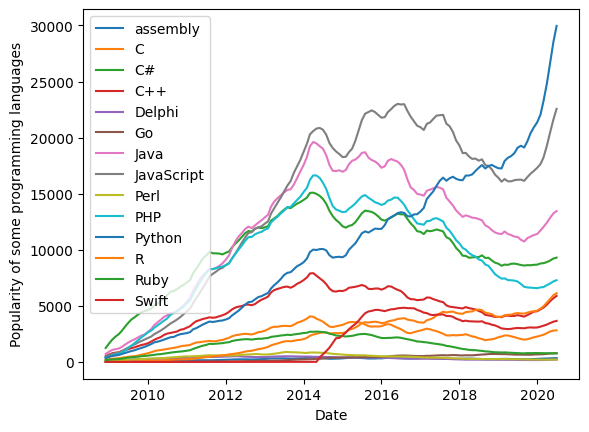

In [156]:
xpoints1 = date_array
ypoints2 = assembly_data
ypoints3 = c_data
ypoints4 = c_sharp_data
ypoints5 = cpp_data
ypoints6 = delphi_data
ypoints7 = go_data
ypoints8 = javas_data
ypoints9 = javascript_data
ypoints10 = perl_data
ypoints11 = php_data
ypoints12 = pythons_data
ypoints13 = r_data
ypoints14 = ruby_data
ypoints15 = swift_data

plt.ylabel("Popularity of some programming languages")
plt.xlabel("Date")

plt.plot(xpoints1, ypoints2, label="assembly")
plt.plot(xpoints1, ypoints3, label="C")
plt.plot(xpoints1, ypoints4, label="C#")
plt.plot(xpoints1, ypoints5, label="C++")
plt.plot(xpoints1, ypoints6, label="Delphi")
plt.plot(xpoints1, ypoints7, label="Go")
plt.plot(xpoints1, ypoints8, label="Java")
plt.plot(xpoints1, ypoints9, label="JavaScript")
plt.plot(xpoints1, ypoints10, label="Perl")
plt.plot(xpoints1, ypoints11, label="PHP")
plt.plot(xpoints1, ypoints12, label="Python")
plt.plot(xpoints1, ypoints13, label="R")
plt.plot(xpoints1, ypoints14, label="Ruby")
plt.plot(xpoints1, ypoints15, label="Swift")

plt.legend()

plt.show()